In [2]:
!git clone https://github.com/elonmj/Projet_tutore_ARZ

Cloning into 'Projet_tutore_ARZ'...
remote: Enumerating objects: 736, done.
remote: Counting objects: 100% (303/303), done.
remote: Compressing objects: 100% (228/228), done.
remote: Total 736 (delta 152), reused 199 (delta 75), pack-reused 433 (from 1)
Receiving objects: 100% (736/736), 14.91 MiB | 57.20 MiB/s, done.
Resolving deltas: 100% (378/378), done.


In [1]:
import os
import shutil
import time
import numpy as np # Import numpy for potential analysis later

# --- Configuration ---
# Adjust 'arz-traffic' if your Kaggle input dataset/repo name is different
SOURCE_REPO_DIR = '/kaggle/input/arz-traffic'
WORKING_DIR = '/kaggle/working/'
# Choose a scenario to test (make sure it exists in your config folder)
#SCENARIO_FILE = 'config/scenario_mass_conservation.yml'
# SCENARIO_FILE = 'config/scenario_riemann_test.yml'
# SCENARIO_FILE = 'config/scenario_degraded_road.yml'

# List of directories/files to copy from your repo to the working directory
ITEMS_TO_COPY = [
    'code',
    'config',
    'data'
]

# --- Setup Environment ---
print(f"Setting up environment in {WORKING_DIR}...")
print(f"Source repository directory: {SOURCE_REPO_DIR}")

# Copy items
print(f"Copying necessary files from {SOURCE_REPO_DIR} to {WORKING_DIR}...")
for item in ITEMS_TO_COPY:
    s = os.path.join(SOURCE_REPO_DIR, item)
    d = os.path.join(WORKING_DIR, item)
    if os.path.isdir(s):
        if os.path.exists(d):
            print(f"Removing existing directory: {d}")
            shutil.rmtree(d)
        try:
            shutil.copytree(s, d, dirs_exist_ok=False)
            print(f"Copied directory: {item}")
        except Exception as e:
            print(f"Error copying directory {item}: {e}")
            # Consider stopping if essential directories fail
            # raise e
    elif os.path.isfile(s):
        os.makedirs(os.path.dirname(d), exist_ok=True)
        try:
            shutil.copy2(s, d)
            print(f"Copied file: {item}")
        except Exception as e:
            print(f"Error copying file {item}: {e}")
    else:
        print(f"Warning: Item '{item}' not found in source directory '{s}'.")

print("File copying complete.")

# Change current directory to the working directory
try:
    os.chdir(WORKING_DIR)
    print(f"Changed current working directory to: {os.getcwd()}")
except FileNotFoundError:
    print(f"Error: Working directory {WORKING_DIR} not found after copying.")
    # Handle error appropriately, maybe stop execution

# # Verify key files exist
# print("Verifying key files...")
# main_script_path = 'code/main_simulation.py'
# scenario_path = SCENARIO_FILE
# if not os.path.exists(main_script_path):
#     print(f"Error: Main script '{main_script_path}' not found in working directory.")
# if not os.path.exists(scenario_path):
#     print(f"Error: Scenario file '{scenario_path}' not found in working directory.")

# # --- Run Simulation with GPU ---
# print("\n" + "="*50)
# print(f"Running Simulation: {SCENARIO_FILE} on GPU")
# print("="*50)

# Ensure the path to main_simulation.py and the scenario file are correct
# relative to the /kaggle/working/ directory after copying.
# Using --device gpu to test the new ODE solver path.
# Using --quiet to reduce output, remove it for more details.

# !python code/main_simulation.py --scenario config/scenario_degraded_road.yml --device gpu

Setting up environment in /kaggle/working/...
Source repository directory: /kaggle/input/arz-traffic
Copying necessary files from /kaggle/input/arz-traffic to /kaggle/working/...
Copied directory: code
Copied directory: config
Copied directory: data
File copying complete.
Changed current working directory to: /kaggle/working


In [2]:

import os
import shutil
import time

# --- 1. Setup Environment and Copy Files ---
print("Setting up environment in /kaggle/working/ for CPU run...")
source_dir = '/kaggle/input/arz-traffic' # Adjust if needed
destination_dir = '/kaggle/working/'
print(f"Source repository directory: {source_dir}")
items_to_copy = ['code', 'config', 'data']
print(f"Copying necessary files from {source_dir} to {destination_dir}...")
for item in items_to_copy:
    s = os.path.join(source_dir, item)
    d = os.path.join(destination_dir, item)
    if os.path.isdir(s):
        if os.path.exists(d): print(f"Removing existing directory: {d}"); shutil.rmtree(d)
        shutil.copytree(s, d, dirs_exist_ok=False); print(f"Copied directory: {item}")
    elif os.path.isfile(s):
        os.makedirs(os.path.dirname(d), exist_ok=True); shutil.copy2(s, d); print(f"Copied file: {item}")
    else: print(f"Warning: {item} not found in source directory '{s}'.")
print("File copying complete.")
os.chdir(destination_dir)
print(f"Changed current working directory to: {os.getcwd()}")

# --- 2. Run CPU Simulation ---
print("\nRunning CPU simulation...")
cpu_output_dir = "results_cpu"
os.makedirs(cpu_output_dir, exist_ok=True)
start_cpu_time = time.time()
# Use '!' prefix for the main simulation command
!python code/main_simulation.py \
    --scenario config/scenario_mass_conservation.yml \
    --device cpu \
    --output_dir {cpu_output_dir} \
    #--quiet
end_cpu_time = time.time()
print(f"\nCPU Simulation finished.")
print(f"CPU run wall time: {end_cpu_time - start_cpu_time:.2f} seconds.")

# --- 3. Verify Output (using os.listdir) ---
print(f"\nFiles in CPU results directory ({cpu_output_dir}):")
try:
    files = os.listdir(cpu_output_dir)
    if files: [print(f"  - {f}") for f in files]
    else: print("  (Directory is empty)")
except FileNotFoundError: print(f"  Error: Directory not found: {cpu_output_dir}")
except Exception as e: print(f"  Error listing files in {cpu_output_dir}: {e}")

cpu_conservation_dir = os.path.join(cpu_output_dir, "conservation")
print(f"\nFiles in CPU conservation directory ({cpu_conservation_dir}):")
try:
    files = os.listdir(cpu_conservation_dir)
    if files: [print(f"  - {f}") for f in files]
    else: print("  (Directory is empty)")
except FileNotFoundError: print(f"  Error: Directory not found: {cpu_conservation_dir}")
except Exception as e: print(f"  Error listing files in {cpu_conservation_dir}: {e}")


Setting up environment in /kaggle/working/ for CPU run...
Source repository directory: /kaggle/input/arz-traffic
Copying necessary files from /kaggle/input/arz-traffic to /kaggle/working/...
Removing existing directory: /kaggle/working/code
Copied directory: code
Removing existing directory: /kaggle/working/config
Copied directory: config
Removing existing directory: /kaggle/working/data
Copied directory: data
File copying complete.
Changed current working directory to: /kaggle/working

Running CPU simulation...
--------------------------------------------------
Starting Full Simulation
Scenario Config: config/scenario_mass_conservation.yml
Base Config:     config/config_base.yml
Output Dir:      results_cpu
--------------------------------------------------
Initializing simulation from scenario: config/scenario_mass_conservation.yml
Using device: cpu
Parameters loaded for scenario: mass_conservation_test
Grid initialized: Grid1D(N=200, xmin=0.0, xmax=1000.0, dx=5.0000, ghost=2, N_tota

In [22]:
import os
import shutil
import time
import numpy as np # Import numpy for potential analysis later

# --- Configuration ---
# Adjust 'arz-traffic' if your Kaggle input dataset/repo name is different
SOURCE_REPO_DIR = '/kaggle/input/arz-traffic'
WORKING_DIR = '/kaggle/working/'
# Choose a scenario to test (make sure it exists in your config folder)
SCENARIO_FILE = 'config/scenario_mass_conservation.yml'
# SCENARIO_FILE = 'config/scenario_riemann_test.yml'
# SCENARIO_FILE = 'config/scenario_degraded_road.yml'

# List of directories/files to copy from your repo to the working directory
ITEMS_TO_COPY = [
    'code',
    'config',
    'data'
]

# --- Setup Environment ---
print(f"Setting up environment in {WORKING_DIR}...")
print(f"Source repository directory: {SOURCE_REPO_DIR}")

# Copy items
print(f"Copying necessary files from {SOURCE_REPO_DIR} to {WORKING_DIR}...")
for item in ITEMS_TO_COPY:
    s = os.path.join(SOURCE_REPO_DIR, item)
    d = os.path.join(WORKING_DIR, item)
    if os.path.isdir(s):
        if os.path.exists(d):
            print(f"Removing existing directory: {d}")
            shutil.rmtree(d)
        try:
            shutil.copytree(s, d, dirs_exist_ok=False)
            print(f"Copied directory: {item}")
        except Exception as e:
            print(f"Error copying directory {item}: {e}")
            # Consider stopping if essential directories fail
            # raise e
    elif os.path.isfile(s):
        os.makedirs(os.path.dirname(d), exist_ok=True)
        try:
            shutil.copy2(s, d)
            print(f"Copied file: {item}")
        except Exception as e:
            print(f"Error copying file {item}: {e}")
    else:
        print(f"Warning: Item '{item}' not found in source directory '{s}'.")

print("File copying complete.")

# Change current directory to the working directory
try:
    os.chdir(WORKING_DIR)
    print(f"Changed current working directory to: {os.getcwd()}")
except FileNotFoundError:
    print(f"Error: Working directory {WORKING_DIR} not found after copying.")
    # Handle error appropriately, maybe stop execution

# Verify key files exist
print("Verifying key files...")
main_script_path = 'code/main_simulation.py'
scenario_path = SCENARIO_FILE
if not os.path.exists(main_script_path):
    print(f"Error: Main script '{main_script_path}' not found in working directory.")
if not os.path.exists(scenario_path):
    print(f"Error: Scenario file '{scenario_path}' not found in working directory.")

# --- Run Simulation with GPU ---
print("\n" + "="*50)
print(f"Running Simulation: {SCENARIO_FILE} on GPU")
print("="*50)

# Ensure the path to main_simulation.py and the scenario file are correct
# relative to the /kaggle/working/ directory after copying.
# Using --device gpu to test the new ODE solver path.
# Using --quiet to reduce output, remove it for more details.
simulation_command = f"python {main_script_path} --scenario {scenario_path} --device gpu --quiet"

print(f"Executing command: {simulation_command}")
start_gpu_time = time.time()
# Use ! to execute the shell command in Kaggle
!{simulation_command}
end_gpu_time = time.time()
gpu_duration = end_gpu_time - start_gpu_time

print("\n" + "="*50)
print(f"Simulation finished.")
print(f"GPU run wall time: {gpu_duration:.2f} seconds.")
print("="*50)

# --- Verify Output ---
# Your results should be saved in /kaggle/working/results/
# You can download them from the Output section of your Kaggle notebook.
print("\nChecking output files...")
results_dir = 'results'
if os.path.exists(results_dir):
    print(f"Files in {results_dir}:")
    !ls -lh {results_dir} # List files with sizes
    # Check specific subdirectories if needed, e.g., for mass conservation
    if 'mass_conservation' in SCENARIO_FILE:
        conservation_dir = os.path.join(results_dir, 'conservation')
        if os.path.exists(conservation_dir):
            print(f"\nFiles in {conservation_dir}:")
            !ls -lh {conservation_dir}
        else:
            print(f"Directory {conservation_dir} not found.")
else:
    print(f"Results directory '{results_dir}' not found. Simulation might have failed.")

print("\nKaggle test script finished.")

Setting up environment in /kaggle/working/...
Source repository directory: /kaggle/input/arz-traffic
Copying necessary files from /kaggle/input/arz-traffic to /kaggle/working/...
Removing existing directory: /kaggle/working/code
Copied directory: code
Removing existing directory: /kaggle/working/config
Copied directory: config
Removing existing directory: /kaggle/working/data
Copied directory: data
File copying complete.
Changed current working directory to: /kaggle/working
Verifying key files...

Running Simulation: config/scenario_mass_conservation.yml on GPU
Executing command: python code/main_simulation.py --scenario config/scenario_mass_conservation.yml --device gpu --quiet
--------------------------------------------------
Starting Full Simulation
Scenario Config: config/scenario_mass_conservation.yml
Base Config:     config/config_base.yml
Output Dir:      results
--------------------------------------------------
/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/dis

Setting up environment in /kaggle/working/...
Copying necessary files from /kaggle/input/arz-traffic to /kaggle/working/...
Removing existing directory: /kaggle/working/code
Copied directory: code
File copying complete.
Changed current working directory to: /kaggle/working
Verifying comparison script exists...
code/compare_cpu_gpu.py found.

Finding result files...
Verifying result files were found...
Found CPU result file: results_cpu/mass_conservation_test_20250425_074705.npz
Found GPU result file: results/mass_conservation_test_20250425_074757.npz

Running comparison script...
Executing: python code/compare_cpu_gpu.py "results_cpu/mass_conservation_test_20250425_074705.npz" "results/mass_conservation_test_20250425_074757.npz" --plot_output "mass_conservation_comparison.png"
--- Loading Data ---
Loading CPU results from: results_cpu/mass_conservation_test_20250425_074705.npz
Simulation data successfully loaded from: results_cpu/mass_conservation_test_20250425_074705.npz
Loading GPU r

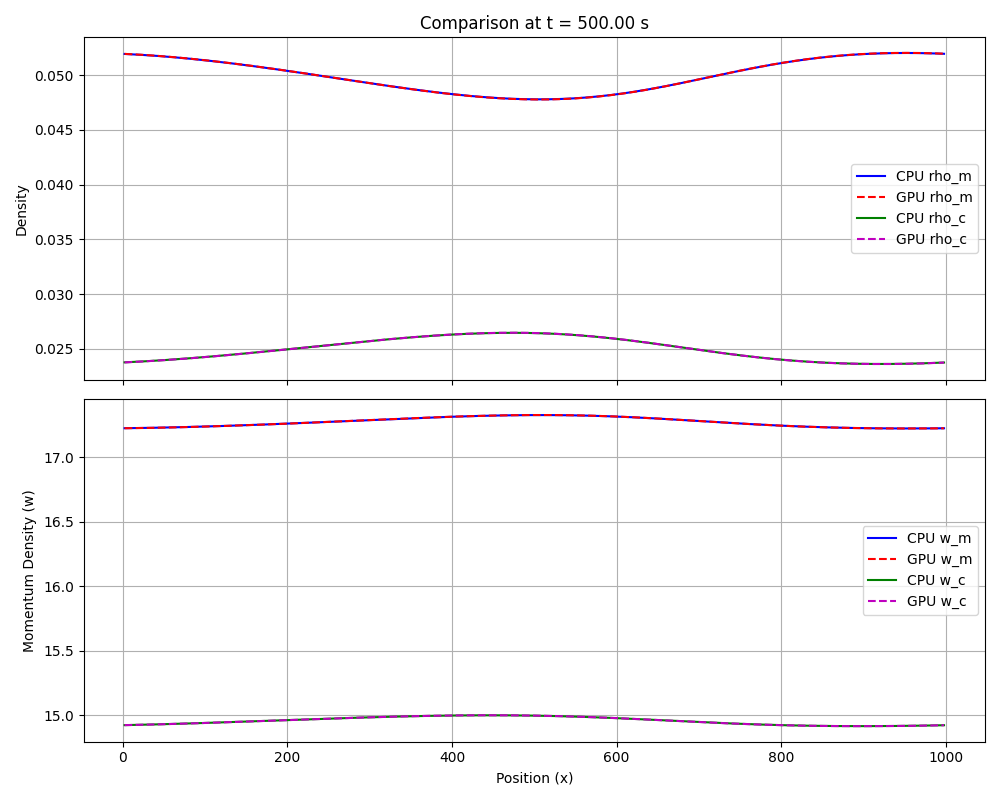

In [13]:
# %% [markdown]
# ## 4. Compare CPU vs GPU Results
#
# This cell runs the comparison script using the output from the CPU and GPU runs above.

# %%
import os
import shutil
import time
import glob # Import glob to find files

# --- 1. Setup Environment (Ensure code is copied if needed) ---
# This assumes the previous cells have already run and copied the 'code' directory.
# If running this cell independently, uncomment and adapt the copying logic.
print("Setting up environment in /kaggle/working/...")
source_dir = '/kaggle/input/arz-traffic'
destination_dir = '/kaggle/working/'
items_to_copy = ['code'] # Only need code for the comparison script
print(f"Copying necessary files from {source_dir} to {destination_dir}...")
for item in items_to_copy:
    s = os.path.join(source_dir, item)
    d = os.path.join(destination_dir, item)
    if os.path.isdir(s):
        if os.path.exists(d):
            print(f"Removing existing directory: {d}")
            shutil.rmtree(d)
        shutil.copytree(s, d, dirs_exist_ok=False)
        print(f"Copied directory: {item}")
print("File copying complete.")
os.chdir(destination_dir)
print(f"Changed current working directory to: {os.getcwd()}")

print("Verifying comparison script exists...")
comparison_script_path = "code/compare_cpu_gpu.py"
if os.path.exists(comparison_script_path):
    print(f"{comparison_script_path} found.")
else:
    print(f"ERROR: {comparison_script_path} NOT found!")
    # Consider stopping or adding error handling

# --- 2. Find Result File Paths ---
print("\nFinding result files...")
# CPU file is expected in results_cpu directory
cpu_results_dir = "results_cpu"
cpu_files = glob.glob(os.path.join(cpu_results_dir, "*.npz"))
# Find the most recently created/modified .npz file in the CPU results dir
cpu_file = max(cpu_files, key=os.path.getctime) if cpu_files else None

# GPU file is expected in the default results directory
gpu_results_dir = "results"
gpu_files = glob.glob(os.path.join(gpu_results_dir, "*.npz"))
# Find the most recently created/modified .npz file in the GPU results dir
gpu_file = max(gpu_files, key=os.path.getctime) if gpu_files else None

plot_file = "mass_conservation_comparison.png" # Output plot filename

print("Verifying result files were found...")
if cpu_file and os.path.exists(cpu_file):
    print(f"Found CPU result file: {cpu_file}")
else:
    print(f"ERROR: CPU result file (.npz) not found in '{cpu_results_dir}'")

if gpu_file and os.path.exists(gpu_file):
    print(f"Found GPU result file: {gpu_file}")
else:
    print(f"ERROR: GPU result file (.npz) not found in '{gpu_results_dir}'")


# --- 3. Run Comparison Script ---
print("\nRunning comparison script...")
# Check if the script and both result files were found before running
if cpu_file and gpu_file and os.path.exists(comparison_script_path):
    # Construct the command safely
    command = f"python {comparison_script_path} \"{cpu_file}\" \"{gpu_file}\" --plot_output \"{plot_file}\""
    print(f"Executing: {command}")
    # Use ! to execute the shell command
    !{command}
    print(f"\nComparison finished. Check output above and the plot file: {plot_file}")
    # Display the plot if possible in Kaggle
    from IPython.display import Image, display
    if os.path.exists(plot_file):
        print("\nDisplaying comparison plot:")
        display(Image(filename=plot_file))
    else:
        print(f"Plot file {plot_file} not found after script execution.")

else:
    print("\nComparison script skipped because the script or one or both result files were not found.")


In [17]:
# In a notebook cell:
!ncu --target-processes all -o profile_report python code/main_simulation.py --scenario config/scenario_mass_conservation.yml --device gpu

--------------------------------------------------
Starting Full Simulation
Scenario Config: config/scenario_mass_conservation.yml
Base Config:     config/config_base.yml
Output Dir:      results
--------------------------------------------------
Initializing simulation from scenario: config/scenario_mass_conservation.yml
Using device: gpu
Parameters loaded for scenario: mass_conservation_test
Grid initialized: Grid1D(N=200, xmin=0.0, xmax=1000.0, dx=5.0000, ghost=2, N_total=204, R loaded=No)
  Loading road quality type: uniform
  Uniform road quality value: 1
Road quality loaded.
Initial state created.
Initializing mass conservation check...
  Initial Mass (Motos): 5.000000e+01
  Initial Mass (Cars):  2.500000e+01
Running simulation until t = 500.00 s, outputting every 10.00 s
Running Simulation:   0%|                            | 0.0/500.0 [00:00<?, ?s/s]==PROF== Connected to process 245 (/usr/bin/python3.11)
/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/dispatcher.py

In [ ]:
!python code/main_simulation.py --scenario config/scenario_degraded_road.yml --device gpu

--------------------------------------------------
Starting Full Simulation
Scenario Config: config/scenario_degraded_road.yml
Base Config:     config/config_base.yml
Output Dir:      results
--------------------------------------------------
Initializing simulation from scenario: config/scenario_degraded_road.yml
Using device: gpu
Parameters loaded for scenario: degraded_road_test
Grid initialized: Grid1D(N=200, xmin=0.0, xmax=1000.0, dx=5.0000, ghost=2, N_total=204, R loaded=No)
  Loading road quality type: from_file
  Loading road quality from file: data/R_degraded_road_N200.txt
Road quality loaded.
Initial state created.
Running simulation until t = 120.00 s, outputting every 5.00 s
Running Simulation:   0%|                            | 0.0/120.0 [00:00<?, ?s/s]/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/dispatcher.py:579: NumbaPerformanceWarning: Grid size 7 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/us

In [ ]:
!python code/main_simulation.py --scenario config/scenario_degraded_road.yml --device gpu


In [5]:
import os
import shutil
import time
import numpy as np # Import numpy for potential analysis later

# --- Configuration ---
# Adjust 'arz-traffic' if your Kaggle input dataset/repo name is different
SOURCE_REPO_DIR = '/kaggle/input/arz-traffic'
WORKING_DIR = '/kaggle/working/'
# Choose a scenario to test (make sure it exists in your config folder)
#SCENARIO_FILE = 'config/scenario_mass_conservation.yml'
# SCENARIO_FILE = 'config/scenario_riemann_test.yml'
# SCENARIO_FILE = 'config/scenario_degraded_road.yml'

# List of directories/files to copy from your repo to the working directory
ITEMS_TO_COPY = [
    'code',
    'config',
    'data'
]

# --- Setup Environment ---
print(f"Setting up environment in {WORKING_DIR}...")
print(f"Source repository directory: {SOURCE_REPO_DIR}")

# Copy items
print(f"Copying necessary files from {SOURCE_REPO_DIR} to {WORKING_DIR}...")
for item in ITEMS_TO_COPY:
    s = os.path.join(SOURCE_REPO_DIR, item)
    d = os.path.join(WORKING_DIR, item)
    if os.path.isdir(s):
        if os.path.exists(d):
            print(f"Removing existing directory: {d}")
            shutil.rmtree(d)
        try:
            shutil.copytree(s, d, dirs_exist_ok=False)
            print(f"Copied directory: {item}")
        except Exception as e:
            print(f"Error copying directory {item}: {e}")
            # Consider stopping if essential directories fail
            # raise e
    elif os.path.isfile(s):
        os.makedirs(os.path.dirname(d), exist_ok=True)
        try:
            shutil.copy2(s, d)
            print(f"Copied file: {item}")
        except Exception as e:
            print(f"Error copying file {item}: {e}")
    else:
        print(f"Warning: Item '{item}' not found in source directory '{s}'.")

print("File copying complete.")

# Change current directory to the working directory
try:
    os.chdir(WORKING_DIR)
    print(f"Changed current working directory to: {os.getcwd()}")
except FileNotFoundError:
    print(f"Error: Working directory {WORKING_DIR} not found after copying.")
    # Handle error appropriately, maybe stop execution

# # Verify key files exist
# print("Verifying key files...")
# main_script_path = 'code/main_simulation.py'
# scenario_path = SCENARIO_FILE
# if not os.path.exists(main_script_path):
#     print(f"Error: Main script '{main_script_path}' not found in working directory.")
# if not os.path.exists(scenario_path):
#     print(f"Error: Scenario file '{scenario_path}' not found in working directory.")

# # --- Run Simulation with GPU ---
# print("\n" + "="*50)
# print(f"Running Simulation: {SCENARIO_FILE} on GPU")
# print("="*50)

# Ensure the path to main_simulation.py and the scenario file are correct
# relative to the /kaggle/working/ directory after copying.
# Using --device gpu to test the new ODE solver path.
# Using --quiet to reduce output, remove it for more details.

# !python code/main_simulation.py --scenario config/scenario_degraded_road.yml --device gpu

Setting up environment in /kaggle/working/...
Source repository directory: /kaggle/input/arz-traffic
Copying necessary files from /kaggle/input/arz-traffic to /kaggle/working/...
Removing existing directory: /kaggle/working/code
Copied directory: code
Removing existing directory: /kaggle/working/config
Copied directory: config
Removing existing directory: /kaggle/working/data
Copied directory: data
File copying complete.
Changed current working directory to: /kaggle/working


In [2]:
!python code/main_simulation.py --scenario config/scenario_degraded_road.yml --device gpu

python3: can't open file '/kaggle/working/code/main_simulation.py': [Errno 2] No such file or directory


In [ ]:
!python -m code.main_simulation --scenario config/scenario_red_light.yml --device gpu

In [ ]:
!python code/main_simulation.py --scenario config/scenario_red_light_N400.yml --device gpu

In [ ]:
!python code/main_simulation.py --scenario config/scenario_red_light_K10_15.yml --device gpu

In [ ]:
!python code/main_simulation.py --scenario config/scenario_red_light_original_wall.yml --device gpu

In [6]:
!python code/main_simulation.py --scenario config/scenario_red_light_low_tau.yml --device gpu

--------------------------------------------------
Starting Full Simulation
Scenario Config: config/scenario_red_light_low_tau.yml
Base Config:     config/config_base.yml
Output Dir:      results
--------------------------------------------------
Initializing simulation from scenario: config/scenario_red_light_low_tau.yml
Using device: gpu
DEBUG PARAMS: Reading K_m_kmh = 5.0
DEBUG PARAMS: Reading K_c_kmh = 7.5
DEBUG PARAMS: Assigned self.K_m = 1.3888888888888888
DEBUG PARAMS: Assigned self.K_c = 2.0833333333333335
Parameters loaded for scenario: red_light_test_low_tau
Grid initialized: Grid1D(N=200, xmin=0.0, xmax=1000.0, dx=5.0000, ghost=2, N_total=204, R loaded=No)
  Loading road quality type: uniform
  Uniform road quality value: 1
Road quality loaded.
Initial state created.
Transferring initial state and road quality to GPU...
GPU data transfer complete.
  DEBUG BC Init: Calculated initial_equilibrium_state = [0.1, 12.183477911381692, 0.03333, 10.315062963333334]
  Populated left i

In [ ]:
!python code/main_simulation.py --scenario config/scenario_red_light_tau_1s.yml --device gpu

In [ ]:
!python code/main_simulation.py --scenario config/scenario_red_light_tau_0_5s.yml --device gpu

In [4]:
 !python code/main_simulation.py --scenario config/scenario_red_light_gamma_m_3.yml --device gpu

--------------------------------------------------
Starting Full Simulation
Scenario Config: config/scenario_red_light_gamma_m_3.yml
Base Config:     config/config_base.yml
Output Dir:      results
--------------------------------------------------
Initializing simulation from scenario: config/scenario_red_light_gamma_m_3.yml
Using device: gpu
DEBUG PARAMS: Reading K_m_kmh = 5.0
DEBUG PARAMS: Reading K_c_kmh = 7.5
DEBUG PARAMS: Assigned self.K_m = 1.3888888888888888
DEBUG PARAMS: Assigned self.K_c = 2.0833333333333335
Parameters loaded for scenario: red_light_test_gamma_m_3
Grid initialized: Grid1D(N=200, xmin=0.0, xmax=1000.0, dx=5.0000, ghost=2, N_total=204, R loaded=No)
  Loading road quality type: uniform
  Uniform road quality value: 1
Road quality loaded.
Initial state created.
Transferring initial state and road quality to GPU...
GPU data transfer complete.
  DEBUG BC Init: Calculated initial_equilibrium_state = [0.1, 11.888946873469367, 0.03333, 10.315062963333334]
  Populated 